# Segmentacion de clientes 

Suponga que tenemos una empresa que vende parte del producto y desea saber qué tan bien funciona el rendimiento de venta 

del producto.

Tiene los datos que podemos analizar, pero ¿qué tipo de análisis podemos hacer?

Bueno, podemos segmentar a los clientes en función de su comportamiento de compra en el mercado.

Tenga en cuenta que los datos son realmente enormes y no podemos analizarlos a simple vista. Tenemos que utilizar algoritmos

de aprendizaje automático y el poder de la informática para ello.

Este artículo le mostrará cómo agrupar clientes en segmentos según su comportamiento utilizando el algoritmo K-Means en Python.

Espero que este artículo le ayude a saber cómo realizar la segmentación de clientes paso a paso desde la preparación de los

datos para agruparlos.

## Plan de ataque

Antes de entrar en el proceso, le daré un breve resumen sobre qué tipo de pasos seguiremos.

* Reúna los datos
* Preprocesar los datos
* Explore los datos
* Agrupar los datos
* Interpretar el resultado

### Primero que nada se deben de instalar las siguientes librerias

pip install xlrd

pip install seaborn

In [64]:
import pandas as pd                
import matplotlib.pyplot as plt
import numpy as np                 
import seaborn as sns

* Pandas

  La libreria pandas ofrece estructuras flexibles que facilitan la manipulacion y analisis de los datos. 
  Pandas es una libreria que ofrece estructura de datos, la principal estructura es el "dataframe" que puede considerarse como  una table 2D en memoria (como una hoja de calculo, con nombre de columnas y etiquetas de fila).
  Pandas proporciona un alto rendimiento para manipular (unir, dividir, modificar, etc) grandes conjutnos de datos
  

* matplotlib

  matplotlib es una libreria que permite la creacion de figuras y graficas de calidad mediante el uso de python
    - Permite la creacion de graficos de manera sencilla y eficiente
    - Permite la integracion de graficos y figuras en cualquer entorno de desarrollo de Python

* Numpy

  Numpy es una libreria especializada en el calculo numerico y el analisis de datos, especialmente para un gran volumen de datos
    - Proporciona arrays de N - dimensiones
    - Implementa funciones matematicas sofisticadas
    - Proporciona herramientas para integrar c/c++ y fortran

* Seaborn

  Seaborn es una librería para Python que permite generar fácilmente elegantes gráficos. 
  Seaborn esta basada en matplotlib y proporciona una interfaz de alto nivel que es realmente sencilla de aprender. 
  Dada su gran popularidad se encuentra instalada por defecto en la distribución Anaconda.

## Descargamos y visualizamos el set de datos con la ayuda de Pandas

In [65]:
df = pd.read_excel('D:/BRITA INTELIGENCIA ARTIFICIAL/CURSO IA/Ejercicio clasificacion/Online Retail.xlsx')

In [66]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


La función de Pandas dataframe.notna () detecta valores existentes / que no faltan en el marco de datos. 
La función devuelve un objeto booleano que tiene el mismo tamaño que el del objeto al que se aplica, indicando si cada valor individual es un valor na o no. Todos los valores no perdidos se asignan a verdadero y los valores perdidos se asignan a falso. 

In [67]:
df = df[df['CustomerID'].notna()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Se tomaran 10,000 valores de forma aleatoria de nuestro dataset 

In [68]:
df_fix = df.sample(10000, random_state = 42)   # random_state = 42 es la semilla que funciona para obtener los mismos 
                                               #                   valores al replicar el ejercicio
df_fix

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
...,...,...,...,...,...,...,...,...
123,536381,22083,PAPER CHAIN KIT RETROSPOT,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
449041,C575082,21843,RED RETROSPOT CAKE STAND,-4,2011-11-08 13:30:00,10.95,12613.0,Germany
425967,573340,21733,RED HANGING HEART T-LIGHT HOLDER,2,2011-10-30 11:55:00,2.95,14159.0,United Kingdom
70029,541997,22919,HERB MARKER MINT,5,2011-01-25 10:38:00,0.65,18077.0,United Kingdom


In [69]:
df_fix.shape

(10000, 8)

## Preprocesamiento de datos

Instalamos la libreria datetime

Create RFM Table

Después de muestrear los datos, haremos que los datos sean más fáciles de realizar un análisis.

Para segmentar al cliente, hay algunas métricas que podemos usar, como cuándo el cliente compró el producto por última vez, con qué frecuencia compra el cliente el producto y cuánto paga el cliente por el producto. A esta segmentación la llamaremos segmentación RFM.

Para crear la tabla RFM, podemos crear estas columnas, como la columna Antigüedad, Frecuencia y Valor monetario.
Para obtener el número de días para la columna de antigüedad, podemos restar la fecha de la instantánea con la fecha en la que ocurrió la transacción.

Para crear la columna de frecuencia, podemos contar cuántas transacciones realiza cada cliente.

Por último, para crear la columna de valor monetario, podemos sumar todas las transacciones de cada cliente.

In [70]:
# Convertir para mostrar solo la fecha
from datetime import datetime 
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date

In [71]:
df_fix["InvoiceDate"]

47912     2011-01-07
342630    2011-09-15
288183    2011-08-03
325368    2011-09-04
331450    2011-09-08
             ...    
123       2010-12-01
449041    2011-11-08
425967    2011-10-30
70029     2011-01-25
282657    2011-07-28
Name: InvoiceDate, Length: 10000, dtype: object

In [72]:
# Crear columna TotalSum
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"]

In [73]:
df_fix["TotalSum"]

47912     15.90
342630    15.80
288183    -3.40
325368     6.60
331450    13.20
          ...  
123        2.95
449041   -43.80
425967     5.90
70029      3.25
282657     9.36
Name: TotalSum, Length: 10000, dtype: float64

In [74]:
# Crear una variable de fecha que registre la actualidad.
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)

In [75]:
snapshot_date

datetime.date(2011, 12, 10)

In [76]:
# Datos agregados por cada cliente
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [77]:
customers

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30
...,...,...,...
18265.0,73,2,39.60
18272.0,3,11,206.17
18274.0,18,2,-4.65


In [79]:
# Cambiar el nombre de las columnas
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [80]:
customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30
...,...,...,...
18265.0,73,2,39.60
18272.0,3,11,206.17
18274.0,18,2,-4.65


En este momento, el conjunto de datos consta de la columna de actualidad, frecuencia y valor monetario. Pero todavía no podemos usar el conjunto de datos porque tenemos que preprocesar los datos más.

## Gestionar la asimetría y la escala

Tenemos que asegurarnos de que los datos cumplan con estos supuestos, son,
Los datos deben cumplir con supuestos en los que las variables no estén sesgadas y tengan la misma media y varianza.
Por eso, tenemos que gestionar la asimetría de las variables.
Aquí están las visualizaciones de cada variable,

C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

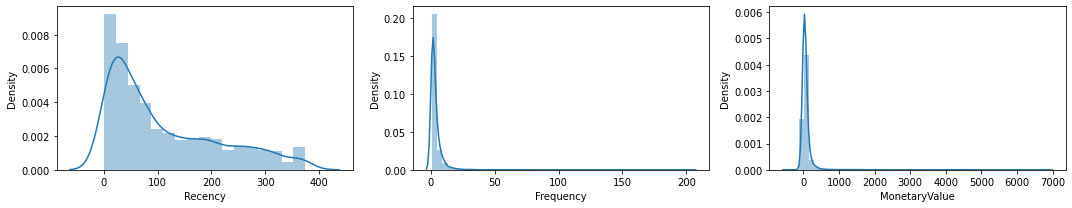

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

Hay algunos métodos que podemos utilizar para gestionar la asimetría, son,

* transformación de registro
* transformación de raíz cuadrada
* transformación box-cox

Nota: Podemos usar la transformación si y solo si la variable solo tiene valores positivos.
A continuación se muestra la visualización de cada variable y con y sin transformaciones. Desde la parte superior izquierda en el sentido de las agujas del reloj en cada variable se muestra la gráfica sin transformación, transformación logarítmica, transformación de raíz cuadrada y transformación de box-cox.

In [85]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

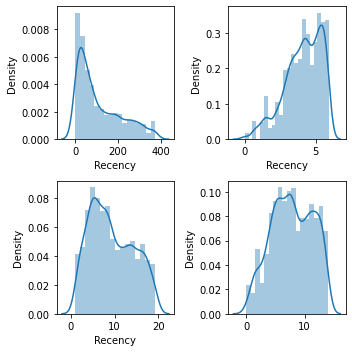

0.93
-0.72
0.32
-0.1


In [86]:
analyze_skewness('Recency')

C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

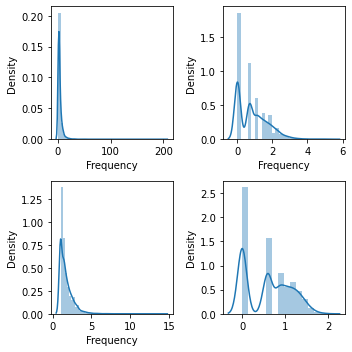

14.77
0.85
3.67
0.16


In [87]:
analyze_skewness('Frequency')

C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


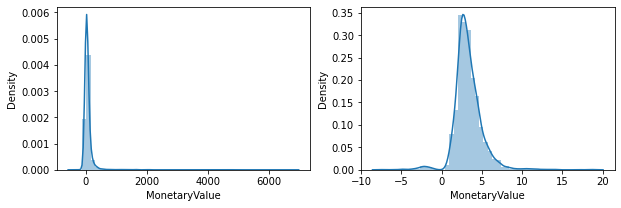

16.63
1.16


In [88]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customers['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [89]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([ 5.10702607,  4.94445183,  6.78785317, ..., -1.66910753,
        4.27320639,  4.0872497 ])

In [90]:
# Establecer los números 
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2685,7.832068,0.591193,3.408514
2686,1.269495,1.435599,5.907565
2687,4.288385,0.591193,-1.669108
2688,1.665555,1.615329,4.273206
2689,6.340700,1.017445,4.087250


## Variables de centrado y escala

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


In [92]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-0.493794,1.012426,1.017503
1,1.232949,-0.017412,0.925115
2,-0.994917,-0.017412,1.972690
3,-0.012582,1.012426,0.572565
4,1.155005,-0.017412,-0.056441


## Modelado
## Elija el número k

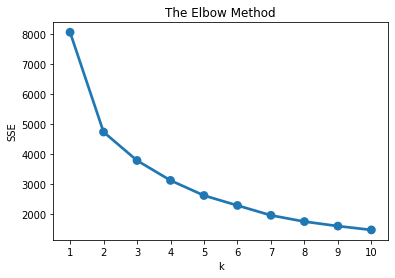

In [93]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [94]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2690,)

In [95]:
customers.shape

(2690, 3)

In [96]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,5,133.20,0
12348.0,249,2,120.88,2
12349.0,19,2,312.75,0
12352.0,73,5,80.85,0
12354.0,233,2,33.30,2


In [97]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          46.2       7.7         165.8   924
1          47.6       1.6          21.5   811
2         227.3       1.6          28.7   955

## Parcelas de serpientes

In [98]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.493794,1.012426,1.017503,12347.0,0
1,1.232949,-0.017412,0.925115,12348.0,2
2,-0.994917,-0.017412,1.972690,12349.0,0
3,-0.012582,1.012426,0.572565,12352.0,0
4,1.155005,-0.017412,-0.056441,12354.0,2


In [99]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,0,Recency,-0.493794
1,12348.0,2,Recency,1.232949
2,12349.0,0,Recency,-0.994917
3,12352.0,0,Recency,-0.012582
4,12354.0,2,Recency,1.155005


C:\Users\ingGu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

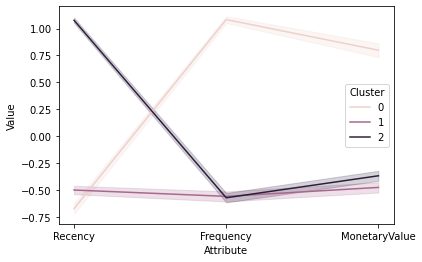

In [100]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

In [101]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          46.2       7.7         165.8   924
1          47.6       1.6          21.5   811
2         227.3       1.6          28.7   955

In [102]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,1.073687,1.251856,-0.583125
1,NaN,-0.566482,-0.707823,-0.570779
2,NaN,-0.557770,-0.610126,1.048910
